In [ ]:
!nvidia-smi

In [ ]:
# Mounting the drive and copying the code from github to drive...deeplearn.anilaknb@gmail.com

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import numpy as np

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

In [ ]:
!git clone https://github.com/pjreddie/darknet

In [ ]:
cd darknet/cfg

/content/darknet/cfg


In [ ]:
# Load Yolo
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/darknet/cfg/yolov3.cfg")

In [ ]:
classes = []
with open("/content/darknet/data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
img_list = ["/content/darknet/data/dog.jpg",
            "/content/darknet/data/eagle.jpg",
            "/content/darknet/data/horses.jpg",
            "/content/darknet/data/giraffe.jpg",
            "/content/darknet/data/Yolo_Selfie.jpg"]

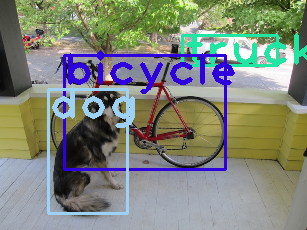

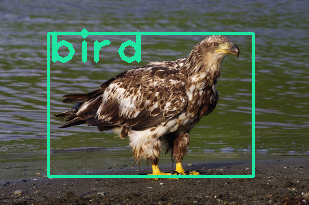

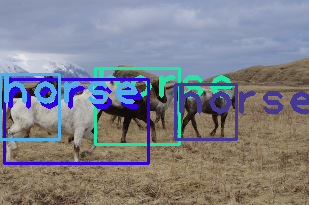

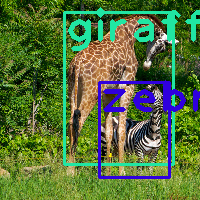

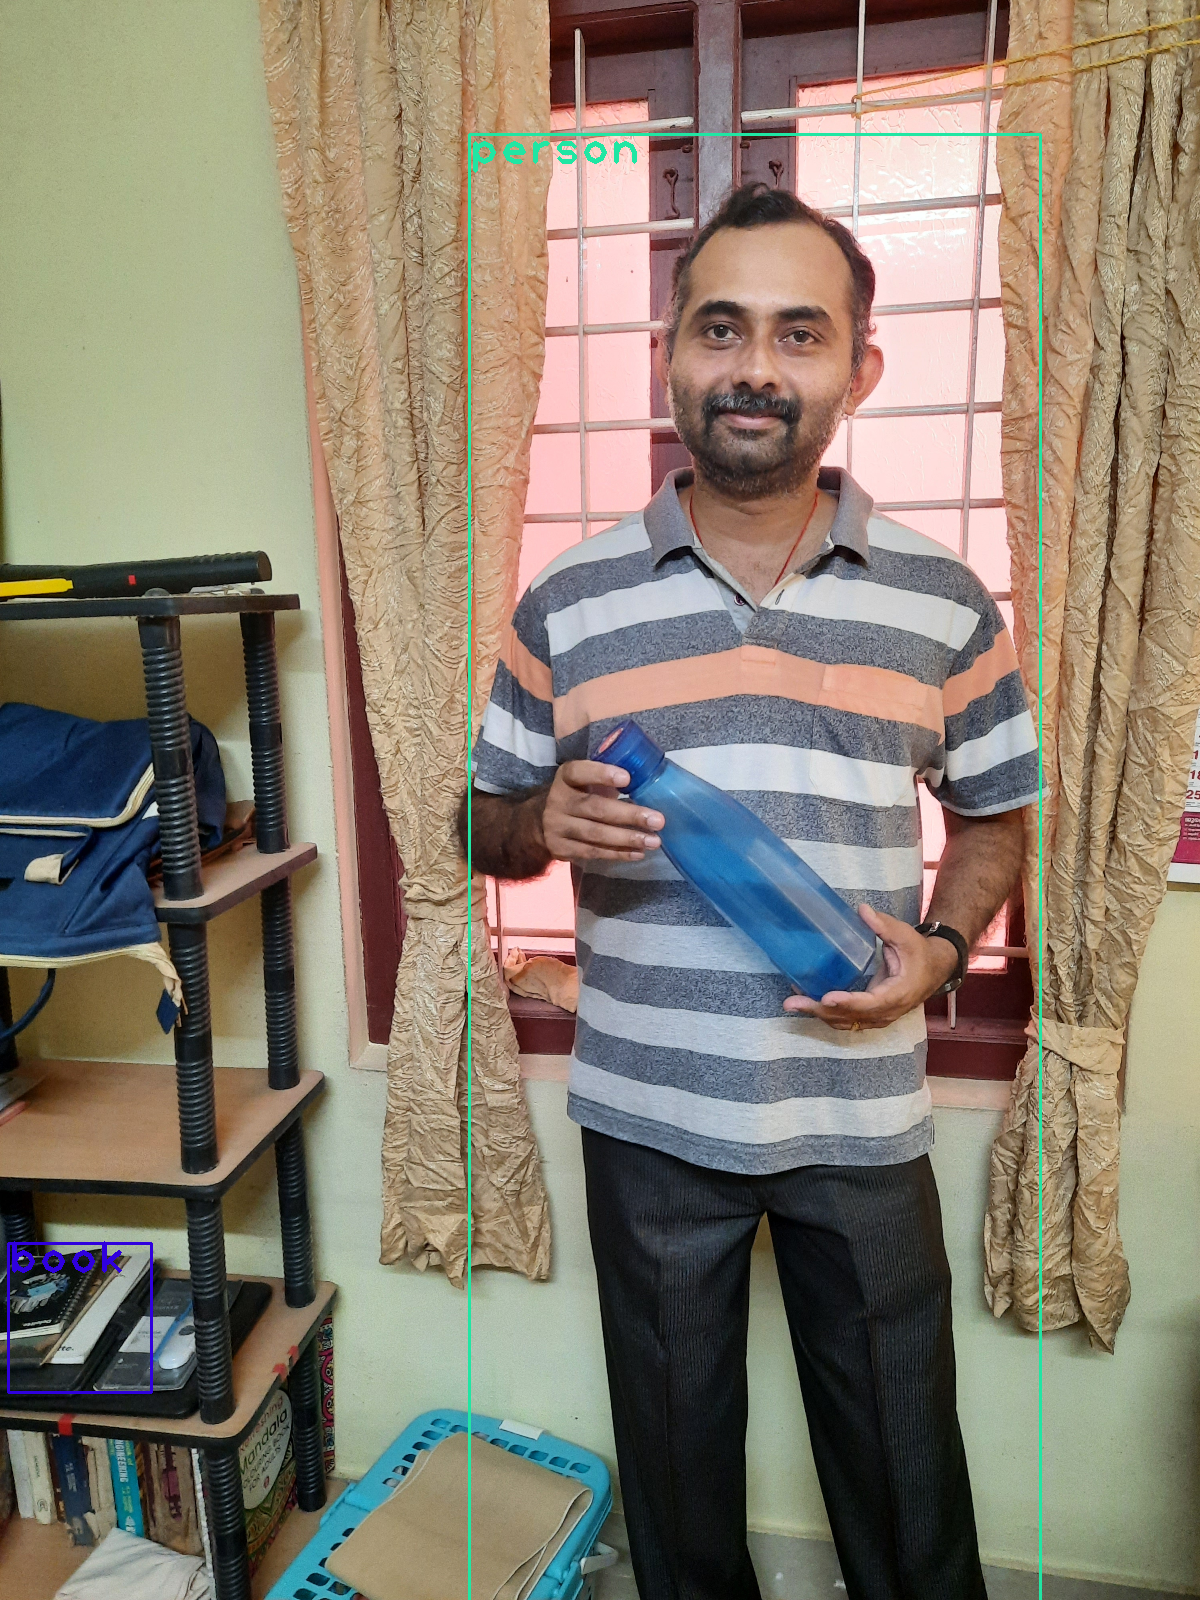

In [ ]:
for i in range(len(img_list)):
    # Loading image
    img = cv2.imread(img_list[i])
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    #print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
          if i in indexes:
              x, y, w, h = boxes[i]
              label = str(classes[class_ids[i]])
              color = colors[i]
              cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
              cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

    from google.colab.patches import cv2_imshow
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()